In [6]:
q = 8.375e-6;  s = 77.27;  w = 0.161;
f = @(t, u, p) [ s*(u(2)- u(1) * u(2) + u(1) - q * u(1)^2);...
    (-u(2) - u(1) * u(2) + u(3)) / s; ...
    w*(u(1) - u(3)) ];

ivp = ode(ODEFcn=f);
ivp.InitialTime = 0;
ivp.InitialValue = [1; 2; 3];

[**Demo %s**](#demo-stiffness-explicit)

The `ode15s` solver is good for stiff problems and needs few time steps to solve the Oregonator from {numref}`Demo {number} <demo-stiffness-oregon>`.

In [7]:
ivp.Solver = "ode15s";
tic,  sol = solve(ivp, 0, 26); 
time_ode15s = toc
num_steps_ode15s = length(sol.Time) - 1

time_ode15s = 0.0628

num_steps_ode15s = 220

But if we apply {numref}`Function {number} <function-rk23>` to the problem, the step size will be made small enough to cope with the large negative eigenvalue.

In [8]:
tic, [t, u] = rk23(ivp, 0, 26, 1e-5);
time_rk23 = toc
num_steps_rk23 = length(t) - 1

time_rk23 = 0.0780

num_steps_rk23 = 44445

Starting from the eigenvalues of the Jacobian matrix, we can find an effective $\zeta(t)$ by multiplying with the local time step size. The values of $\zeta(t)$ for each time level are plotted below and color coded by component of the diagonalized system.

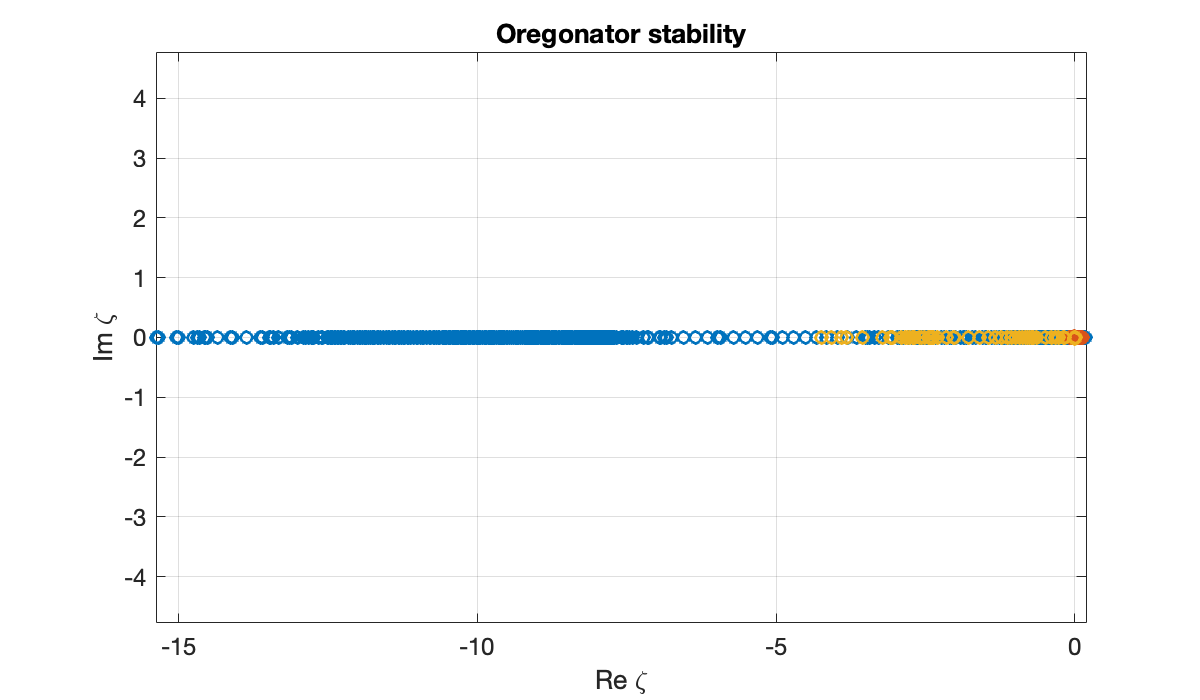

In [9]:
J = @(u) [ -s*(u(2)+1-2*q*u(1)), s*(1-u(1)), 0; ...
    -u(2)/s, (-1-u(1))/s, 1/s; ...
    w,0,-w];

zeta = zeros(length(t) - 1, 3);
for j = 1:length(t)-1
    lambda = eig(J(u(:, j)));
    zeta(j, :) = (t(j+1) - t(j)) * lambda;
end
plot(zeta, 'o')
axis equal, grid on
xlabel('Re \zeta'),  ylabel('Im \zeta')
title("Oregonator stability")

Roughly speaking, the $\zeta$ values stay within or close to the RK2 stability region in {numref}`figure-stabreg_bd_rk`. Momentary departures from the region are possible, but time stepping repeatedly in that situation would cause instability.